# Import thư viện

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Thêm dữ liệu từ keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

# Hiển thị dữ liệu hình ảnh

In [5]:
# Xem thử dữ liệu
import matplotlib.pyplot as plt
from PIL import Image

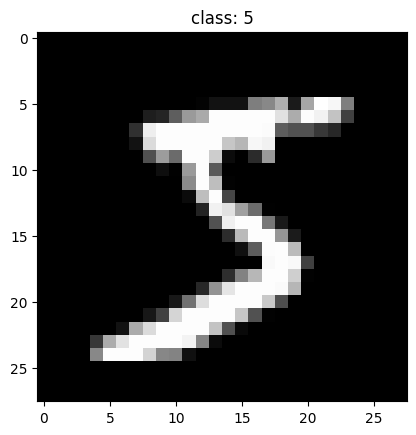

In [6]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap="gray")
plt.title(f"class: {y_train[0]}")
plt.show()

# Biến đổi dữ liệu

In [7]:
# 0...255 -> 0...1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32")/255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- `n` số hình (60k)
- `w` chiều rộng (28, ma trận là 28 ô ở chiều rộng)
- `h` chiều dài (28, ma trận có 28 ô ở chiều dài)
- `d` direction (vì hình trắng đen nên chọn d=1, hình có màu RG3 thì d = 3)

In [8]:
# Thêm chiều cho direction
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- `n` số hình (60k)
- `class` số lớp (kết quả gồm bao nhiệu loại khác nhau?)

In [9]:
my_classes = 10 # Từ 0->9
y_train = keras.utils.to_categorical(y_train, my_classes)
y_test = keras.utils.to_categorical(y_test, my_classes)
y_train.shape, y_test.shape


((60000, 10), (10000, 10))

# Huấn luyện mô hình

In [10]:
input_shape = (28,28,1) #28 ô chiều ngang, 28 ô chiều dọc, và chỉ đi theo một chiều
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape= input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3)), #Thêm một layer mới để học nhiều hơn (tăng độ phức tạp)
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(), #Làm phẳng thành list 1 chiều
    keras.layers.Dense(my_classes, activation='softmax'), #Phân loại biến class theo class
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Huấn luyện
batch_size = 128 #Số ảnh được xử lý mỗi lần mô hình cập nhật
epochs = 5 #Số lần lập của toàn bộ dữ liệu được huấn luyện
validation_split = 0.1 # Tách 10% dữ liệu từ tập train thành validation, đảm bảo mô hình không bị overfiting (biases)
model.fit(X_train, y_train, batch_size = batch_size, epochs= epochs, validation_split= validation_split)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9187 - loss: 0.2873 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9753 - loss: 0.0828 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9805 - loss: 0.0644 - val_accuracy: 0.9865 - val_loss: 0.0555
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9844 - loss: 0.0531 - val_accuracy: 0.9858 - val_loss: 0.0528
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9859 - loss: 0.0464 - val_accuracy: 0.9850 - val_loss: 0.0563


# Đạm giá mô hình

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}") 
print(f"Test accuracy: {accuracy}") #Bao nhiêu phần trăm dự đoán trên tập test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0477
Test loss: 0.04770655930042267
Test accuracy: 0.9847000241279602


# Dự đoán

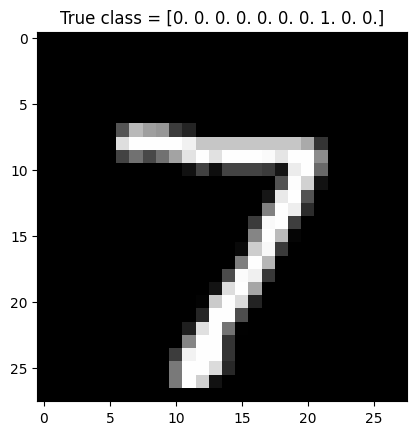

In [13]:
test_img = X_test[0]
img = Image.fromarray((test_img.squeeze() *255).astype("uint8"))
plt.imshow(img, cmap='gray')
plt.title(f"True class = {y_test[0]}")
plt.show()

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.
[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]

In [14]:
test_img = np.expand_dims(test_img,0)
preds = model.predict(test_img)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[2.2839592e-08, 2.5024890e-06, 1.9671364e-05, 1.4120204e-05,
        5.2878690e-10, 1.0942724e-08, 1.5993166e-14, 9.9995995e-01,
        4.5547136e-08, 3.6897088e-06]], dtype=float32)

In [15]:
test_pred = np.argmax(preds) #lấy cái predict cao nhất
print(f"Predicted class = {test_pred}")

Predicted class = 7
